# Introduction to Linear Regression

-----


In a previous notebook, you were introduced to the concept of linear regression by learning about simple linear regression. This initial approach treated linear regression as a statistical technique where the relation between independent variables (or features) and a dependent variable (or target) was determined by a mathematical relation. While powerful, the previous approach treated linear regression as a distinct, statistical approach to relating independent variables with a dependent variable. In this notebook, we instead treat linear regression as a machine learning task. As a result, in this notebook, we will use regression to _fit a model to data_. The model generated in this fashion can be explored in greater detail to either understand why the provided data follow the generated model (i.e., gain insight into the data), or the model can be used to generate new dependent values from future or unseen data (i.e., make predictions from the model).

-----

## Table of Contents

[Formalism](#Formalism)

[Cost Function](#Cost-Function)

[Linear Regression with Scikit Learn](#Linear-Regression-with-Scikit-Learn)

- [Data Preparation](#Data-Preparation)

- [Linear Regression](#Linear-Regression)

- [Multivariate Regression](#Multivariate-Regression)

[Categorical Variables](#Categorical-Variables)

[Linear Regression with Categorical Variables](#Linear-Regression-with-Categorical-Variables)

[Linear Regression with StatsModel](#Linear-Regression-with-Statsmodels)

-----

Before proceeding with the _Formalism_ section of this Notebook, we first have our standard notebook setup code, after which we load a sample data set, the _tips_ data from Seaborn, and perform simple linear regression.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

-----

In this notebook, we will use the _tips_ data set from the Seaborn module. After loading this data into our Notebook, we display several random rows, and next compute a simple linear regression to predict the `tip` feature from the `total_bill` feature, as demonstrated in the _Introduction to Ordinary Linear Regression_ notebook.

-----

In [2]:
# Load Data Set
tdf = sns.load_dataset('tips')

# Display several random rows
tdf.sample(5)

,total_bill,tip,sex,smoker,day,time,size
164,17.51,3.00,Female,Yes,Sun,Dinner,2
117,10.65,1.50,Female,No,Thur,Lunch,2
187,30.46,2.00,Male,Yes,Sun,Dinner,5
242,17.82,1.75,Male,No,Sat,Dinner,2
200,18.71,4.00,Male,Yes,Thur,Lunch,3


In [3]:
# Perform simple linear regression
from scipy import stats as sts

# Extract one-dimensional arrays for our features
x = tdf.total_bill.as_matrix()
y = tdf.tip.as_matrix()

# Compute linear model
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(x, y)

# Display Results
print(f'Best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}\n')

Best fit line: y = 0.11 x + 0.920
Pearsonr correlation = 0.676



-----

[Back to TOC](#Table-of-Contents)

## Formalism

-----

In the introduction to ordinary linear regression notebook, we computed a best-fit, simple linear model to the first data set in Anscombe's quartet. Formally, this simple linear model related the independent variables $x_i$ to the dependent variables $y_i$ in our data set via two parameters: an intercept, and a slope. Mathematically, we express this relation in the following form:

$f(x_i) = \beta * x_i + \alpha + \epsilon_i$

where $\epsilon_i$ accounts for the difference between the model and the data for each data point $(x_i, y_i)$. If we have a perfect model, these errors, $\epsilon_i$, are all zero, and $y_i = f(x_i)$. In real life, however, the error terms rarely vanish because even if the original relationship is perfect noise creeps into the measurement process. 

As a result, in this simple example we wish to determine the model parameters: $\beta$, and $\alpha$ that minimize the values of $\epsilon_i$. We could perform this process in an iterative manner, trying different values for the model parameters and measuring the error function. This approach is often used in machine learning, where we define a **cost function** that we seek to minimize by selecting the best model parameters. 

In the case of a simple linear model, we have several potential cost (or loss) functions that we could seek to minimize, but we will use the common _l2-norm_: $\epsilon_i^2 = \left( \ y_i - f(x_i) \ \right)^2$, where $f(x_i)$ is defined by our model parameters. We demonstrate this approach visually in the following code block, where we minimize the sum of the _l2-norm_ model residuals, which is done by finding the best model parameters: $\hat{\beta}$, and $\hat{\alpha}$. 

-----

Minimial Cost (l2 Norm) = 13.76


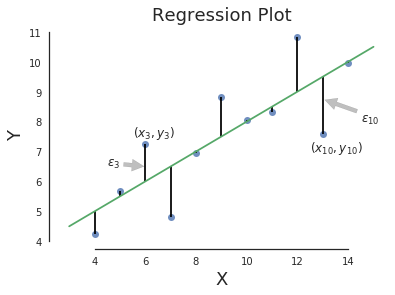

In [4]:
# Load Anscombe's Quartet
adf = sns.load_dataset("anscombe")

# Select only the first data set
adfi = adf[adf.dataset == 'I']

# Extract the x & y columns as NumPy arrays, 
# we call them xx and yy to avoid conflict with the tips data
xx = adfi.x.as_matrix()
yy = adfi.y.as_matrix()

# Number of data points
n = xx.shape[0]

# Determine mean values
mux = np.mean(xx)
muy = np.mean(yy)

# Determine best fit model parameters (from simple linear regression)
beta = np.sum((xx - mux) * (yy - muy)) / np.sum((xx - mux)**2)
alpha = muy - beta * mux

# Plot the data as a Regression Plot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=False)

# Label plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Regression Plot', fontsize=18)

# Compute and draw epsilons
fy = beta * xx + alpha
ax.vlines(xx, yy, fy)

print(f'Minimial Cost (l2 Norm) = {np.sum((fy - yy)**2):5.2f}')

# Annotate third point
ax.annotate(r'$(x_3, y_3)$', xy=(6, 7), xytext=(5.5, 7.5))

ax.annotate(r'$\epsilon_3$', xy=(6, 6.5), xytext=(4.5, 6.5),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Annotate tenth point
ax.annotate(r'$(x_{10}, y_{10})$', xy=(13, 7.5), xytext=(12.5, 7.0))

ax.annotate(r'$\epsilon_{10}$', xy=(13, 8.75), xytext=(14.5, 8.0),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Compute and plot linear model
xx = np.arange(3, 16)
yy = beta * xx + alpha
ax.plot(xx, yy)

sns.despine(offset = 5, trim=True)

-----

[Back to TOC](#Table-of-Contents)

## Cost Function

This simple example demonstrates a fundamental concept in machine learning, namely the minimization of a cost (or loss) function, which quantifies how well a model represents a data set. For a given data set, the cost function is completely specified by the model parameters, thus a more complex model has a more complex cost function, which can become difficult to minimize. To clarify this point, we now turn to the exploration of the shape of  cost functions. 

For simplicity, we start with a one-dimensional cost function, a linear model with no intercept: $f(x_i) = \beta x_i$. In the following code cell, we compute the cost function for a given data set as a function of the unknown parameter $\beta$. In this case, the minimum is easy to visualize, given the steepness of the cost function around the minimum. 

One trick we employ in this example is the use of `np.vectorize`, which turns our simple cost function into a _vectorized_ function that can be broadcast to a NumPy array. This simplifies our code as we remove the need for an explicit loop. We also display the cost as a logarithmic quantity, demonstrating the true steepness of our cost function about the minimal cost.

-----

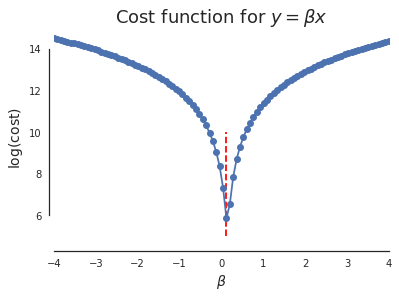

In [5]:
# Define our one-dimensional grid boundaries
beta_low = -4; beta_high = 4

# Number of steps in any direction
steps = 100

# Our beta parameters for the cost function
betas = np.linspace(beta_low, beta_high, steps)

# Our cost function: We compute the natural logarithm of the standard
# l2-norm of the model residuals to enhance the scale.
def cost(m):
    return np.log(np.sum((y - m * x)**2))

# Now vectorize our function
v_cost = np.vectorize(cost)

# Our cost function sampled at every point
epsilons = v_cost(betas)

# Now plot the result
fig, ax = plt.subplots()

# First we draw the OLS result
ax.vlines(slope, 5, 10, color='r', linestyles='--')

# Now plot the loss function
ax.plot(betas, epsilons, marker='o')

# Change the axis limits displayed in our plot
ax.set_xlim(beta_low, beta_high)
    
# Decorate our plot appopriately
ax.set_xlabel(r"$\beta$", fontsize=14)
ax.set_ylabel(r"$\log$(cost)", fontsize=14)
ax.set_title(r"Cost function for $y = \beta x$", fontsize=18)

# Clean up final result
sns.despine(offset=5, trim=True)

-----

In general, however, we face two challenges:

1. the cost function will likely be more complex, and
2. our data will be higher dimensional.

In general, we must employ a (potentially) complex mathematical technique to find the (hopefully) global minimum of the cost function. We can increase the complexity of our _cost_ function analysis by extending the original model to include both a slope and an intercept. We now must find the minimum of this two dimensional model, given our observed data. We do this in the following code cell where we generate a grid of values in our two parameters, and compute the cost function for these different parameter combinations.

To display the data, we will use the NumPy `meshgrid` method, which generates a sampling grid across potential values for the slope ($\beta$) and intercept ($\alpha$) in our model. We once again _vectorize_ our cost function and broadcast it across the sampling grid. We accumulate the cost at each grid point and generate a two-dimensional image of the values of the cost function across our sampling grid. We show this result by using the matplotlib `imshow` method. To make the image appear cleaner, we perform _Gaussian_ interpolation between sample points. 

As the following two-dimensional image displays, our cost function is not aligned with either parameter, but is steeper in the slope parameter and less steep in the intercept parameter. Thus, we would expect that small changes in the slope will quickly increase our cost (which we saw in the previous one-dimensional example), while small changes in the intercept will produce smaller changes in our cost function (note that the range for intercepts is much larger than the range for the slope parameters).

-----

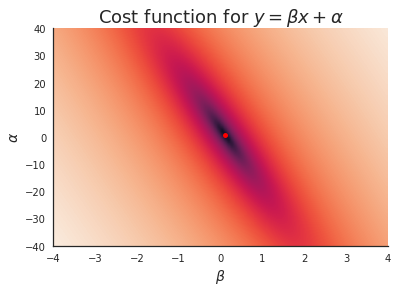

In [6]:
# Define our two-dimensional grid boundaries
beta_low = -4; beta_high = 4
alpha_low = -40; alpha_high = 40

# Number of steps in any direction
steps = 100

# Define our sampling grid for slopes and intercepts
betas, alphas = np.meshgrid(np.linspace(beta_low, beta_high, steps),
                            np.linspace(alpha_low, alpha_high, steps))

# Our cost function: We compute the natural logarithm of the standard
# l2-norm of the model residuals to enhance the scale.
def cost(m, b):
    return np.log(np.sum((y - m * x - b)**2))

# Now vectorize our function
v_cost = np.vectorize(cost)

# Our cost function sampled at every grid point
epsilons = v_cost(betas, alphas)

# Now plot the result
fig, ax = plt.subplots()

# First we draw the OLS result
ax.plot(slope, intercept, marker='o', color='r', markersize=5)

# Now plot the sampled grid as an image
ax.imshow(epsilons, origin='lower', interpolation="gaussian", 
          extent=[beta_low, beta_high, alpha_low, alpha_high], 
          aspect='auto')

# Decorate final plot
ax.set_xlabel(r"$\beta$", fontsize=14)
ax.set_ylabel(r"$\alpha$", fontsize=14)
ax.set_title(r"Cost function for $y = \beta x + \alpha$", fontsize=18)

# Clean up final result
sns.despine(offset=0, trim=True)

-----

As we move to higher dimensional data sets or more complex cost functions, the challenge of finding the global minimum becomes increasingly difficult. As a result, many mathematical techniques have been developed to find the global minimum of a (potentially) complex function. The standard approach is [gradient descent][wgd], where we use the fact that the first derivative (or gradient) measures the slope of a function at a given point. We can use the slope to infer which direction is _downhill_ and thus travel (hopefully) towards the minimum. 

A major challenge with this approach is the potential to become stuck in a local and not global minima. Thus, modifications are often added to reduce the likelihood of becoming stuck in a local minimum. One popular example of this approach is known as [stochastic gradient descent][wsgd]. This algorithm employs standard gradient descent, but adds an occasional random jump in the parameter space to reduce the chances of being stuck in a local _valley_. Another, very different, approach to this problem is the use of [genetic algorithms][wga], which employ techniques from evolutionary biology to minimize the cost function.

For a mental picture of this process, imagine hiking in the mountains and flip the challenge to finding the highest peak, so we will use gradient ascent. Gradient ascent is similar to finding the local mountain peak and climbing it. This local peak might look like it is the largest, but a random jump away from the local peak might enable one to view much larger peaks beyond, which can subsequently be climbed with a new gradient ascent.

Whenever you perform machine learning in the future, you should keep in mind that the model that you generate for a given data set has generally resulted from the minimization of a cost function. Thus, there remains the possibility that with more effort, more data, or a better cost minimization strategy, a new, and better model may potentially exist.

-----

[wgd]: https://en.wikipedia.org/wiki/Gradient_descent
[wsgd]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
[wga]: https://en.wikipedia.org/wiki/Genetic_algorithm

[Back to TOC](#Table-of-Contents)

-----

## Linear Regression with Scikit Learn

------

The most commonly used statistical and machine learning library in Python is the [scikit learn][skl] library. This library includes a number of different model fitting techniques (in addition to general regression and classification algorithms) that can be easily applied to a data set. In this notebook, we will focus on the standard linear regression estimator, but much of what you learn in this notebook is applicable to other regressors in the scikit-learn library, since this library employs a standard interface.

To perform linear regression with the scikit-learn library, we first create a [`LinearRegression`][sklr] estimator. Thus, we first import the `linear_model` module, and create the estimator:

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
```
  
When this estimator is created, the following parameters can be specified (they are all optional):
  
- `fit_intercept`: If `True`, the _default_ an intercept is fit for this model.
- `normalize`: If `True` all the features supplied in the `fit` method will be normalized, the _default_ is `False`.
- `copy_X`: If `True`, the _default_, the feature matrix will be copied, otherwise the data may be overwritten during the regression.
  
This regressor has two commonly used attributes, which can be accessed after the model has been fit to the data (note that model attributes in scikit learn are suffixed by an underscore):

- `coef_`: An array of the estimated coefficients for the regressed linear model, in typical usage this is a single dimensional array.
- `intercept_`: The constant term in the regressed linear model, only computed if `fit_intercept` is `True`.
  
Once created, this estimator is _fit_ to the training data, after which it can be used to _predict_ new values from the test data. These two actions, along with a measure of the performance of the regressor, are encapsulated in the following three functions that can be called on a `LinearRegression` estimator:
- `fit`: Fits a linear model to the supplied features.
- `predict`: Predicts new results from the given model for the new supplied features
- `score`: Computes a regression score, specifically the coefficient of determination $R^2$ of the prediction.

-----
[skl]: http://scikit-learn.org/stable/index.html
[sklr]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Preparation

Before computing a linear regression to the _tips_ data, we must first process these data to  make them ready for the `LinearRegression` estimator. This requires that we create NumPy arrays to hold the data and that we separate the original data into _training_ and _testing_ data. We do this in the following code cell by extracting the `Total_bill` column from the _tips_ DataFrame. Next, we extract the labels, or the column to predict in the same manner. Finally, we divide the data and labels into training:testing samples with a 60:40 split.

One important point in this example is the requirement for scikit-learn estimators to accept two-dimensional feature matrices. Thus, since we are extracting only one feature for both the independent and dependent variables, we need to employ the `reshape` method to change the one-dimensional vectors we extract from the _tips_ DataFrame to be explicit, two-dimensional NumPy matrices (n_samples, n_features). Thus, in this example we change the shape of the two feature arrays from `(244,)` to `(244, 1)` by using the `reshape` method.

-----

In [7]:
# We want to split our data into training and testing
from sklearn.model_selection import train_test_split

# This is the amount to hold out for 'blind' testing
frac = 0.4

# Select a single independent variable and the dependent vairable
# We must reshape the arrays to ensure they are of size
# (Num_Samples, Num_Features) or (244, 1) in this case
ind_data = tdf.total_bill.reshape(tdf.shape[0], 1)
dep_data = tdf.tip.reshape(tdf.shape[0], 1)

# Create test/train splits for independent and dependent data
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

----

### Linear Regression

With these data, we can now employ the scikit-learn library’s linear regression estimator to generate a linear model for these data. In the following code cells, we use the `LinearRegression` estimator to fit our sample data, plot the results, and finally display the fit coefficients. 

The first code cell defines a function that will make two plots. The top plot is a comparison between a single independent variable (Total Bill) and the dependent variable (Tip). This plot differentiates the training data, the testing data, and the linear model. The bottom plot displays the model residuals (dependent variable - model result) as a function of the independent variable. The primary benefit of this plot is the ability to identify any structure in the residuals, which can indicate a bad model. For example, if the residual plot shows a linear relationship, that indicates the original model incorrectly related the independent and dependent variables.

In the following code cells, we first compute a linear fit with no intercept, after which we compute a linear fit with both a slope and an intercept. The fit results are displayed as well as the regression and residual plots.

----

In [8]:
from matplotlib import cm

# Plotting function to show both regression fit 
# to the data and the residual plot

def make_lr_plot(ind_train, dep_train, ind_test, dep_test, results):

    # Set up plot area
    sns.set(style="white")
    fig, axs = plt.subplots(figsize=(10, 8), nrows=2, ncols=1, 
                            sharex=True)

    # Add space between plots
    fig.subplots_adjust(hspace=0.5)

    # Plot the training and testing data
    axs[0].scatter(ind_train, dep_train, label='Training Data',
               alpha = .5, cmap=cm.coolwarm)
    axs[0].scatter(ind_test, dep_test, label='Testing Data',
               alpha = .5, cmap=cm.coolwarm)

    # Plot model prediction
    axs[0].plot(ind_test, results, label='Model', c='r', alpha = .25)
    
    # Ensure equal axis
    axs[0].set_aspect('equal')

    # Decorate final plot
    axs[0].set_xlabel("Total Bill", fontsize=14)
    axs[0].set_ylabel("Tip", fontsize=14)
    axs[0].set_title("Regression Plot", fontsize=18)
    axs[0].set_xlim(-2, 52)
    axs[0].set_ylim(-1, 10)
    axs[0].legend()    
    sns.despine(ax=axs[0], trim=True)
    
    # Plot model residuals
    axs[1].scatter(ind_test, dep_test - results, label='Testing Data',
               alpha = .5, cmap=cm.coolwarm)

    # Show zero residual line
    axs[1].hlines(0, 0, 50, color='r', linestyle='--', alpha=0.25)

    # Decorate final plot
    axs[1].set_xlabel("Total Bill", fontsize=14)
    axs[1].set_ylabel("Residual", fontsize=14)
    axs[1].set_title("Regression Plot (model residuals)", fontsize=18)
    axs[1].set_ylim(-5, 5)
    sns.despine(ax=axs[1], trim=True)

tip = 0.14 total_bill
LR Model score =  39.9%


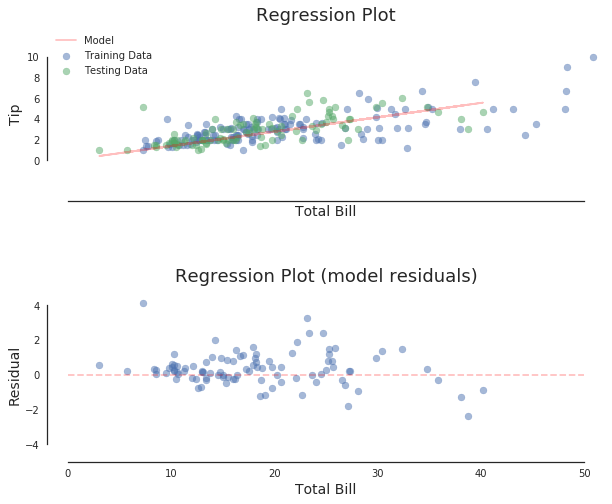

In [9]:
# Import our model
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=False)
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.coef_[0][0]:4.2f} total_bill")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')

make_lr_plot(ind_train, dep_train, ind_test, dep_test, results)

tip = 0.99 + 0.10 total_bill
LR Model score =  46.6%


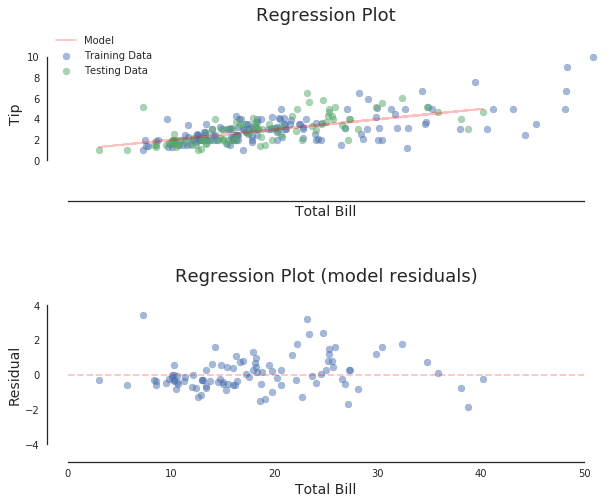

In [10]:
# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=True)
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.intercept_[0]:4.2f} + {model.coef_[0][0]:4.2f} total_bill")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')

make_lr_plot(ind_train, dep_train, ind_test, dep_test, results)

[Back to TOC](#Table-of-Contents)

### Multivariate Regression

Often, using more data will result in more accurate models, since finer details can be captured. For example, if we see structure in a residual plot, the easiest solution is often to add additional independent variables to our model, which results in a multivariate linear regression model. The only major change required to our previous model building code is the expansion of our feature matrix to include the additional independent variables. Thus, if we want to include two independent variables, our feature matrix will have two dimensions (we won't need to call `reshape` since the matrix will already be correctly sized).

To demonstrate building a multi-variate regression model, the following code cell extracts both the `total_bill` and `size` features from the _tips_ data set to use as independent variables. The `tip` feature is also extracted as the dependent variable. The data are divided once again into training and testing sets, and a multivariate regression model is constructed from the feature matrix. One final point, since we have explicitly reshaped the dependent variable array to be a two-dimensional matrix (as opposed to a one-dimensional vector), we have a two-dimensional coefficient matrix. This simply means we must extract the proper fit parameters (e.g., `coef_[0]`) that correspond to our dependent variable.

The following code cells extract the data, generate a multi-variate linear model, display the model parameters, and display the regression and residual plots. To make the regression plot, we must extract only one feature (in this case the `total_bill`). As a result, when we display the generated model, we get a series of lines that are the projections of the multi-variate model on this two-dimensional figure.

----

In [11]:
# This is the amount to hold out for 'blind' testing
frac = 0.4

# Select two independent variables and a single dependent variable
# We only need to reshape the dependent variable array, since the
# feature matrix is properly sized.
ind_data = tdf[['total_bill', 'size']].as_matrix()
dep_data = tdf.tip.reshape(tdf.shape[0], 1)

# Create test/train splits for data and labels
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

tip =  0.69 +  0.09 total_bill  +  0.22 size
Multivariate LR Model score = 46.63%


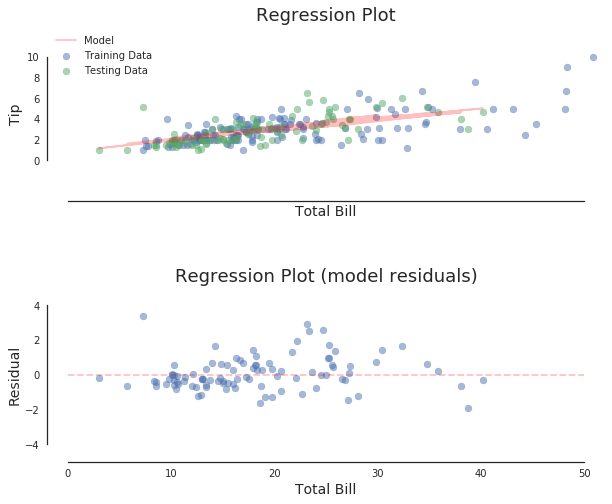

In [12]:
# Fit our linear regression model to training data
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.intercept_[0]:5.2f} + {model.coef_[0][0]:5.2f} total_bill ",
      f"+ {model.coef_[0][1]:5.2f} size")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'Multivariate LR Model score = {score:5.2f}%')

make_lr_plot(ind_train[:,0], dep_train, ind_test[:,0], dep_test, results)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used multi-variate linear regression to predict the `tip` feature from the `total_bill` and `size` features. In the empty **Code** cell below, repeat this process, but instead try to predict the `total_bill` feature from the `tip` and `size` features. Has the prediction performance improved? How do the model residuals compare?

-----

-----

[Back to TOC](#Table-of-Contents)

### Categorical Variables

Many data sets contain features that are non-numerical. For example, the _tips_ data set contains a `day` feature that can take one of four values: `Thur`, `Fri`, `Sat`, and `Sun`. This data set also contains a `sex` feature that can be `Female` or `Male`, and a `smoker` feature that can be `No` or `Yes`. Each of these features are [categorical features][wcf], in that they can only take on one of a limited number of possible values. In general, the possible states are fixed, such as the `sex`, `smoker`, and `day` features discussed previously.

Categorical features can take several forms. For example, a categorical feature, such as `sex` or `smoker` that can take on one of two values is known as a binary feature. Furthermore, categorical features can also be categorized into nominal and ordinal features (note that other classes are also possible, but beyond the scope of this class). 

A [nominal feature][wnf] either is in a category or it isn't, and there are no relations between the different categories. For example, the `sex` category is nominal since there is no numerical relation or ordering among the possible values. On the other hand, an [ordinal feature][wof] is a categorical feature where the possible values have an intrinsic relationship. For example, if we encode the results of a race as _first_, _second_, and _third_, these values have a relationship, in that _first_ comes before the other two, and the difference between _first_ and _second_ is the same as between _second_ and _third_. In our _tips_ example, we could treat the `day` features in this manner, since the days often are treated as having an ordinal relationship.

To use categorical features to generate a machine learning model with the scikit-learn library, we must convert them into numerical values. This process is generally known as encoding, and the scikit-learn library provides several different [encodings][ske] in the `preprocessing` module. 

To begin, we first create a fictitious set of features from the four colors as strings: 'Red', 'Blue', 'Yellow', and 'Green' by using the NmPy `random.choice` method. We transform these categorical features into one of four numerical values by using the [`LabelEncoder`][skle] estimator. We `fit` this estimator to the set of possible categorical values (or four colors), and transform the generated set of features to compare the numerical label to the original color. In this case, we can see that `0` has been assigned to the color 'Blue', `1` to the color 'Red', and so on.

----
[wcf]: https://en.wikipedia.org/wiki/Categorical_variable

[wof]: https://en.wikipedia.org/wiki/Ordinal_data

[wnf]: https://en.wikipedia.org/wiki/Nominal_category
[skle]: http://scikit-learn.org/stable/modules/preprocessing_targets.html#label-encoding

[ske]: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [13]:
from sklearn.preprocessing import LabelEncoder

# Define allowed colors
clrs = ['Red', 'Blue', 'Yellow', 'Green']

# Size of sample
num_clrs = 10

# Create random sample of ten colors
tst = np.random.choice(clrs, size=num_clrs, replace=True)

# Create & fit Label Encoder to allowed labels
le = LabelEncoder()
le.fit(clrs)

# Transform sample data, and reshape vector 
# to a two-dimensional matrix (10, 1)
le_data = le.transform(tst).reshape(num_clrs, 1)

# Display encode label and color
for clr, idx in zip(tst, le_data):
    print(idx, clr)

[0] Blue
[2] Red
[3] Yellow
[3] Yellow
[3] Yellow
[2] Red
[0] Blue
[3] Yellow
[1] Green
[3] Yellow


-----

This encoding is fine if the data are ordinal, but in this case, our colors are likely nominal and there is no numerical relationship between the different features. Thus, we need to perform an additional transformation to convert our data into a numerical format that a machine learning model can effectively process. To do this, a commonly used approach known as _One Hot Encoding_ is used. This approach generates a new feature for each possible value in our category. Thus, for our four colors, we need four features. These features will be binary, in that a value of zero indicates that the feature is not present for the specific instance, and a value of one indicates it is present. Furthermore, only one set of these new features can be present (or on) for a specific instance.

We can leverage this technique by using the [`OneHotEncoder`][sko] estimator from the scikit-learn preprocessing module. This estimator takes an encoded array of integer values and generates a matrix where each column is a binarized feature corresponding to each possible state in the input array. This technique is demonstrated in the following code cell, where we create a `OneHotEncoder` and fit this estimator to our encoded label data from the previous code cell (which only contains the numbers 0, 1, 2, or 3.) The result of this operation is a new matrix that has four columns, with the column corresponding to the label integer set to on (`1`), and the others all set to off (`0`). We also generate a fictitious instance `[0, 1, 0, 0]` and convert this to the appropriate label by using the `inverse_transform` method to find the appropriate integer label, and to use this integer to extract the appropriate color name.

-----
[sko]: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
[sklb]: http://scikit-learn.org/stable/modules/preprocessing_targets.html#label-binarization

In [14]:
# Create our one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

print('Going from color to encoding:\n')
# Display encode label and color
for clr, ohed in zip(tst, ohe.fit_transform(le_data)):
    print(ohed, clr)

# Go in reverse
print('\nGoing from encoding to color:\n')
enc = [0, 1, 0, 0]
print(f'{enc} = {le.inverse_transform(np.argmax(enc))}')

Going from color to encoding:

[ 1.  0.  0.  0.] Blue
[ 0.  0.  1.  0.] Red
[ 0.  0.  0.  1.] Yellow
[ 0.  0.  0.  1.] Yellow
[ 0.  0.  0.  1.] Yellow
[ 0.  0.  1.  0.] Red
[ 1.  0.  0.  0.] Blue
[ 0.  0.  0.  1.] Yellow
[ 0.  1.  0.  0.] Green
[ 0.  0.  0.  1.] Yellow

Going from encoding to color:

[0, 1, 0, 0] = Green


-----

We can perform this process in one step by using the `LabelBinarizer` estimator from the scikit-learn pre-processing module. With this estimator we can directly convert a set of categorical labels to a one hot encoded matrix by using the `fit` method to generate the encoder and the `transform` method applies the encoding to a set of labels. We demonstrate this in the following code cell, which first creates this estimator and fits the estimator to the list of colors. Second, we transform our list of test colors to their binarized version, and display the binarized version and appropriate color name. Finally, we perform the inverse transform to identify the appropriate color for a fictitious binarized color.

-----

In [15]:
# Create label binarizer estimator and fit to the colors
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(clrs)

# Transform and display encode label and color
for clr, idx in zip(tst, lb.transform(tst)):
    print(idx, clr)

# Go in reverse
print('\nGoing from encoding to color:\n')
enc = np.array([0, 1, 0, 0]).reshape(1, len(clrs))
print(f'{enc[0]} = {lb.inverse_transform(enc)}')

[1 0 0 0] Blue
[0 0 1 0] Red
[0 0 0 1] Yellow
[0 0 0 1] Yellow
[0 0 0 1] Yellow
[0 0 1 0] Red
[1 0 0 0] Blue
[0 0 0 1] Yellow
[0 1 0 0] Green
[0 0 0 1] Yellow

Going from encoding to color:

[0 1 0 0] = ['Green']


-----

[Back to TOC](#Table-of-Contents)

## Linear Regression with Categorical Variables

Now that we can convert categorical variables into a numerical representation suitable for use by the scikit-learn library, we can use these new derived features in a multivariate linear regression. To simplify the process, we will use the scikit-learn `LabelBinarizer` to convert the day feature in the _tips_ data set into a set of numerical features. We must add the new derived feature matrix to our existing feature matrix, which will generate a new feature matrix that contains five columns (one for `total_bill` and four for the different days of the week in the tips data set: `Thur`, `Fri`, `Sat`, and `Sun`). Since we are still predicting the same feature (`tip`), we can reuse the dependent variable array.

The next two code cells create a `LabelBinarizer` estimator from the scikit-learn library, and in one step fits the estimator to the tips `day` feature and transforms this feature into a binarized feature matrix by using the `fit_transform` method. We use the `column_stack` method from NumPy to merge the new features into the existing feature matrix (which just contains the `total_bill` feature). Next, we generate our training and testing data sets. The second code cell simply demonstrates the binarized features. Note the use of the `zip` method in the for loop, which _zips_ two arrays together, so that in this case we can display the binarized feature and the corresponding day of the week.

----

In [16]:
lb = LabelBinarizer()
ohe_day = lb.fit_transform(tdf.day.as_matrix())

n_ind_data = np.column_stack((tdf.total_bill, ohe_day))

# Create test/train splits for data and labels
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(n_ind_data, dep_data, test_size=frac, random_state=23)

In [17]:
# Demonstrate encoding results
days = ['Thur', 'Fri', 'Sat', 'Sun']

# Fit, transform, and display encode label and day
for day, idx in zip(days, lb.fit(tdf.day.as_matrix()).transform(days)):
    print(idx, day)

[0 0 0 1] Thur
[1 0 0 0] Fri
[0 1 0 0] Sat
[0 0 1 0] Sun


-----

Given this new feature matrix, we generate a new linear regression model in the following code cell. We fit the model, display the fit coefficients, compute the model performance, and finally display the regression model plot and the residual model plot. In this case, our new model performs slightly worse than the original single variable linear regression model. This suggests that the day of the week is not an important variable in the underlying relationship between `total_bill` and `tip`. By evaluating other feature combinations, you may be able to find a better predicting model.

-----

tip = 1.01
 + 0.10 total_bill
 + 0.10 Day=="Thu"
 + 0.22 Day=="Fri"
 + -0.05 Day=="Sat"
 + -0.27 Day=="Sun"

Multivariate LR Model score =  38.6%


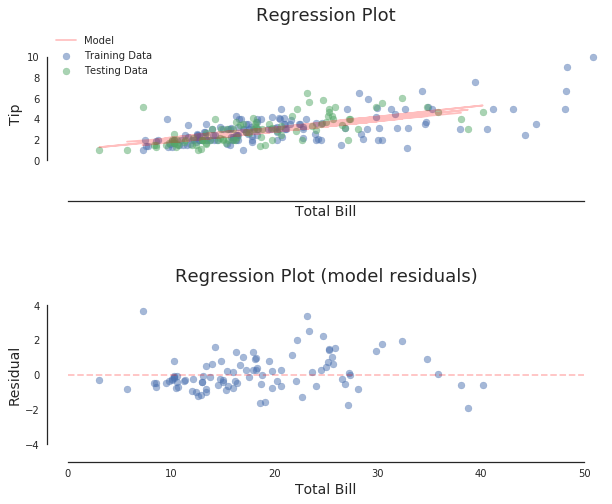

In [18]:
# Fit our linear regression model to training data
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
# Label binarizer sorts the labels, hence change in display order.
print(f'tip = {model.intercept_[0]:4.2f}\n',
      f'+ {model.coef_[0][0]:4.2f} total_bill\n',
      f'+ {model.coef_[0][4]:4.2f} Day=="Thu"\n',
      f'+ {model.coef_[0][1]:4.2f} Day=="Fri"\n',
      f'+ {model.coef_[0][2]:4.2f} Day=="Sat"\n',
      f'+ {model.coef_[0][3]:4.2f} Day=="Sun"\n')

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'Multivariate LR Model score = {score:5.1f}%')

make_lr_plot(ind_train[:,0], dep_train, ind_test[:,0], dep_test, results)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used multi-variate linear regression to predict the `tip` feature from the `total_bill` and categorical `day` features. In the empty **Code** cell below, repeat this process, but use the `total_bill`, `size`, `sex`, and `time` features. Has the prediction performance improved? How do the model residuals compare?

-----

----

[Back to TOC](#Table-of-Contents)

## Linear Regression with Statsmodels

Scikit-learn is the dominant Python machine learning library, and will be the primary library we use to generate models from data. However, an alternative library, [_statsmodels_][sm] is being developed that focuses more on statistical analyses, along with easier integration with the Pandas DataFrame. To demonstrate this new library and how it can be used to perform linear regression, we demonstrate the statsmodels library in the next few code cells to perform linear regression on the _tips_ data. 

Given an appropriate DataFrame, in this case the _tips_ DataFrame, we can easily employ the formulaic interface to obtain an ordinary least squares fit to the data of interest. The formulaic interface is borrowed from the `R` programming language (which drives much of the development of the statsmodels library), and simply relates the dependent variable to the independent variables (or features). Although we do not demonstrate it here, categorical features can easily be handled in this formulaic interface.

In this example, we map the `tip` label to the `total_bill` features in the first example, this will include the constant term in the calculation. In the second example, we remove the constant term to obtain the best fit line with zero intercept (simply for comparison). After we calculate these two fits, we plot the data and fits for a visual analysis of the results. At the end we call the `summary` method, which generates a detailed report showing the fit parameters, and a number of performance metrics. Many of these will be discussed in later lessons.

-----

[sm]: http://statsmodels.sourceforge.net



In [19]:
import statsmodels.formula.api as smf

# Implement simple regression: Result ~ Input

# First we fit slope and intercept
result = smf.ols(formula='tip ~ total_bill', data=tdf).fit()

print(f"tip = {result.params[0]:4.2f} + {result.params[1]:4.2f} total_bill")
print(f'Regression Score: {result.rsquared:4.2f}\n')
# Fit a no intercept line
result_noi = smf.ols(formula='tip ~ total_bill - 1', data=tdf).fit()
print(f"tip = {result_noi.params[0]:4.2f} total_bill")
print(f'Regression Score: {result_noi.rsquared:4.2f}\n')

tip = 0.92 + 0.11 total_bill
Regression Score: 0.46

tip = 0.14 total_bill
Regression Score: 0.89



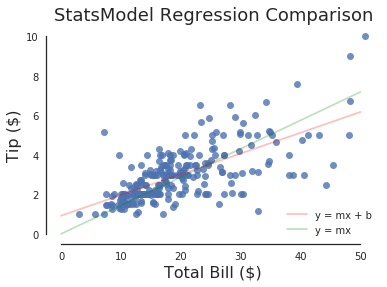

In [20]:
# COmpare tow model fits
ax = sns.regplot('total_bill', 'tip', tdf, fit_reg=False)

# We pick points equally spaced from the min to the max
xfpd = pd.DataFrame(np.linspace(0, 50, 50), columns=['total_bill'])

yfi = result.predict(xfpd)
yfi_noi = result_noi.predict(xfpd)

plt.plot(xfpd['total_bill'], yfi, color='red', alpha = 0.25, label='y = mx + b')
plt.plot(xfpd['total_bill'], yfi_noi, color='green', alpha = 0.25, label='y = mx')

ax.set_title('StatsModel Regression Comparison', fontsize=18)
ax.set_xlabel('Total Bill ($)', fontsize=16)
ax.set_ylabel('Tip ($)', fontsize=16)

ax.legend(loc=4)
sns.despine(offset=0, trim=True)

In [21]:
# Display model fit and performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           6.69e-34
Time:                        01:04:25   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

4. The Wikipedia article on [linear regression][1]
1. A Python-based [tutorial on linear regression][tlr] that focuses on the statsmodels library
2. An older blog article on [Scikit-learn linear regression][3]
21. Another older blog article on [linear regression][4] with Python

23. A [blog article][balr] introducing linear regression with Python
32. A blog article using [linear regression to predict housing prices][5] in Python


-----
[1]: https://en.wikipedia.org/wiki/Linear_regression
[tlr]: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

[3]: http://napitupulu-jon.appspot.com/posts/regression-ud.html
[4]: http://glowingpython.blogspot.com/2015/01/forecasting-beer-consumption-with.html
[5]: http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/?imm_mid=0eddcf&cmp=em-data-na-na-newsltr_20170301

[balr]: https://medium.com/towards-data-science/simple-and-multiple-linear-regression-in-python-c928425168f9

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 